### Evaluating the m5 limits ###

Create "table 2" and "figure 4", from the overview paper.

This uses fiducial construction numbers for the seeing and skybrightness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import rubin_sim.photUtils as photUtils
import syseng_throughputs as st

In [2]:
pd.set_option('precision', 3)

In [3]:
# Read bandpass information.
defaultDirs = st.setDefaultDirs()
addLosses = True
# Use the X=1.0 atmosphere!
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)

In [4]:
# Standard LSST visits, standard LSST readnoise and 1 visit = 15s x 2exp
m5_std = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2)
m5_std

,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,0.92,0.808,22.961,80.841,27.030,0.037,0.058,0.502,0.038,23.186,0.576,0.363,23.870,550.933,23.9,23.4
g,0.87,0.767,22.258,411.095,28.381,0.127,0.154,0.214,0.039,24.429,0.176,0.093,24.822,795.628,25.0,24.6
r,0.83,0.734,21.197,818.797,28.156,0.103,0.116,0.126,0.039,24.446,0.096,0.048,24.359,990.244,24.7,24.3
i,0.80,0.710,20.477,1173.488,27.857,0.078,0.085,0.096,0.039,24.340,0.069,0.033,23.934,1112.331,24.0,23.6
z,0.78,0.693,19.600,1782.992,27.461,0.054,0.058,0.069,0.039,24.181,0.046,0.021,23.363,1306.752,23.3,22.9
y,0.76,0.677,18.610,2371.023,26.680,0.026,0.031,0.170,0.039,23.752,0.035,0.016,22.468,1451.708,22.1,21.7


In [5]:
# Now also use X=1.2 atmosphere.
defaultDirs = st.setDefaultDirs()
addLosses = True
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)
# Calculate degraded seeing values (have to increase FWHM from default values)

# And calculate m5 for a standard visit. 
m5_X = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2, X=1.2)

In [6]:
# Add degradation of m5 when X=1.2 into m5_std columns (dCm_double for double visit time already there)
m5_std['m5_1.2'] = m5_X['m5']
m5_std['dM5_1.2'] = m5_std['m5'] - m5_X['m5']

In [7]:
cols = m5_std.columns
cols = ['skyMag', 'FWHMgeom', 'FWHMeff', 'gamma', 'kAtm', 'Cm', 'm5', 'dCm_infinity', 'dCm_double', 'dM5_1.2']
m5_std[cols].T

,u,g,r,i,z,y
skyMag,22.961,22.258,21.197,20.477,19.600,18.610
FWHMgeom,0.808,0.767,0.734,0.710,0.693,0.677
FWHMeff,0.920,0.870,0.830,0.800,0.780,0.760
gamma,0.038,0.039,0.039,0.039,0.039,0.039
kAtm,0.502,0.214,0.126,0.096,0.069,0.170
Cm,23.186,24.429,24.446,24.340,24.181,23.752
m5,23.870,24.822,24.359,23.934,23.363,22.468
dCm_infinity,0.576,0.176,0.096,0.069,0.046,0.035
dCm_double,0.363,0.093,0.048,0.033,0.021,0.016
dM5_1.2,0.215,0.159,0.142,0.133,0.130,0.140


In [8]:
print(m5_std[cols].T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       u &       g &       r &       i &       z &       y \\
\midrule
skyMag       &  22.961 &  22.258 &  21.197 &  20.477 &  19.600 &  18.610 \\
FWHMgeom     &   0.808 &   0.767 &   0.734 &   0.710 &   0.693 &   0.677 \\
FWHMeff      &   0.920 &   0.870 &   0.830 &   0.800 &   0.780 &   0.760 \\
gamma        &   0.038 &   0.039 &   0.039 &   0.039 &   0.039 &   0.039 \\
kAtm         &   0.502 &   0.214 &   0.126 &   0.096 &   0.069 &   0.170 \\
Cm           &  23.186 &  24.429 &  24.446 &  24.340 &  24.181 &  23.752 \\
m5           &  23.870 &  24.822 &  24.359 &  23.934 &  23.363 &  22.468 \\
dCm\_infinity &   0.576 &   0.176 &   0.096 &   0.069 &   0.046 &   0.035 \\
dCm\_double   &   0.363 &   0.093 &   0.048 &   0.033 &   0.021 &   0.016 \\
dM5\_1.2      &   0.215 &   0.159 &   0.142 &   0.133 &   0.130 &   0.140 \\
\bottomrule
\end{tabular}



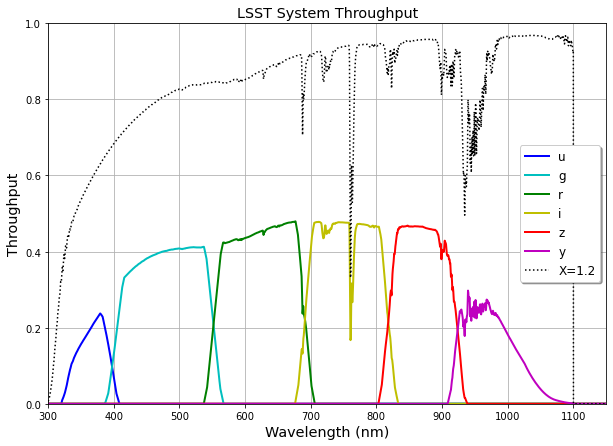

In [9]:
# Generate the plot for Figure 4, using X=1.2
plt.figure(figsize=(10, 7))
st.plotBandpasses(system, title='LSST System Throughput', addlegend=False, newfig=False)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'k:', label='X=1.2')
plt.ylabel("Throughput")
plt.legend(loc='right', numpoints=1, fancybox=True, shadow=True, fontsize='large')
#plt.savefig('Figure4.pdf', format='pdf')